In [1]:
%load_ext autoreload
%autoreload 2


In [2]:
import pickle
from isce.components import isceobj
import numpy as np
import matplotlib.pyplot as plt
import pathlib


2023-10-23 18:53:55,554 - matplotlib - DEBUG - matplotlib data path: /root/tools/mambaforge/lib/python3.10/site-packages/matplotlib/mpl-data
2023-10-23 18:53:55,557 - matplotlib - DEBUG - CONFIGDIR=/root/.config/matplotlib
2023-10-23 18:53:55,558 - matplotlib - DEBUG - interactive is False
2023-10-23 18:53:55,558 - matplotlib - DEBUG - platform is linux
2023-10-23 18:53:55,579 - matplotlib - DEBUG - CACHEDIR=/root/.cache/matplotlib
2023-10-23 18:53:55,579 - matplotlib.font_manager - DEBUG - Using fontManager instance from /root/.cache/matplotlib/fontlist-v330.json


In [3]:
alos1 = "ALPSRP027982170"
alos2 = "ALPSRP026522180"


In [4]:
dir = pathlib.Path(f"/work/isce2_outputs/{alos1}_{alos2}/")


In [5]:
with open(dir / "PICKLE/interferogram", "rb") as fp:
    res = pickle.load(fp)


In [6]:
res["reference"]["instrument"]["incidence_angle"]


38.7

In [7]:
res['reference']['instrument']['radar_wavelength']


0.2360571

In [8]:
from isce.components import isceobj
import numpy as np
from osgeo import gdal


In [9]:
ds = gdal.Open(str(dir / "interferogram/filt_topophase.flat"), gdal.GA_ReadOnly)
igram = ds.GetRasterBand(1).ReadAsArray()
ds = None


In [10]:
mag = np.abs(igram)
mag.shape, np.max(mag)


((4608, 2370), 11726.359)

In [11]:
np.percentile(mag, 75), np.percentile(mag, 100)


(0.13842631503939629, 11726.359375)

In [12]:
mag_clip = np.clip(mag, 0.0, 100)


2023-10-23 18:55:03,773 - matplotlib.pyplot - DEBUG - Loaded backend module://matplotlib_inline.backend_inline version unknown.
2023-10-23 18:55:03,773 - matplotlib.pyplot - DEBUG - Loaded backend module://matplotlib_inline.backend_inline version unknown.
2023-10-23 18:55:03,775 - matplotlib.font_manager - DEBUG - findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
2023-10-23 18:55:03,776 - matplotlib.font_manager - DEBUG - findfont: score(FontEntry(fname='/root/tools/mambaforge/lib/python3.10/site-packages/matplotlib/mpl-data/fonts/ttf/STIXSizTwoSymBol.ttf', name='STIXSizeTwoSym', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
2023-10-23 18:55:03,776 - matplotlib.font_manager - DEBUG - findfont: score(FontEntry(fname='/root/tools/mambaforge/lib/python3.10/site-packages/matplotlib/mpl-data/fonts/ttf/cmtt10.ttf', name='cmtt10', style='normal', variant='normal', weight=400, stretch='normal', size='

2023-10-23 18:55:03,777 - matplotlib.font_manager - DEBUG - findfont: score(FontEntry(fname='/root/tools/mambaforge/lib/python3.10/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSerifDisplay.ttf', name='DejaVu Serif Display', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-10-23 18:55:03,777 - matplotlib.font_manager - DEBUG - findfont: score(FontEntry(fname='/root/tools/mambaforge/lib/python3.10/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSerif.ttf', name='DejaVu Serif', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-10-23 18:55:03,778 - matplotlib.font_manager - DEBUG - findfont: score(FontEntry(fname='/root/tools/mambaforge/lib/python3.10/site-packages/matplotlib/mpl-data/fonts/ttf/STIXSizThreeSymBol.ttf', name='STIXSizeThreeSym', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
2023-10-23 18:55:03,778 - matplotlib.font_manager - DEBUG - f

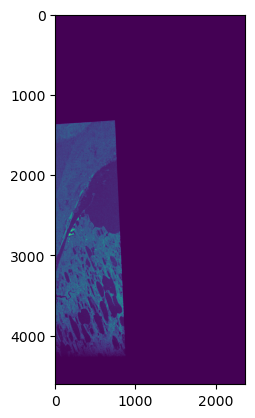

In [13]:
%%time
plt.imshow(np.fliplr(mag_clip))


In [14]:
angle = np.angle(igram)


2023-10-23 18:57:41,820 - matplotlib.colorbar - DEBUG - locator: <matplotlib.ticker.AutoLocator object at 0x7f6af459ea10>


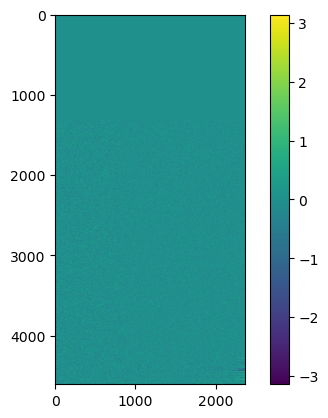

In [18]:
plt.imshow(np.fliplr(angle))
plt.colorbar()
plt.show()


In [23]:
from osgeo import gdal
import matplotlib.pyplot as plt
import sys
sys.path.append("..")
from methods.utils import compute_stats, load_img, LatLonFile


In [24]:
lat_lon = LatLonFile.RDR.create_lat_lon(dir / "geometry")


VERT RES (m) 26.233334633954666
HORIZ RES (m) 26.23333463395467


In [25]:
# + latitude goes higher in image (as expected), + longotide goes left (unexpected)
lat_lon.find_closest_pixel(71.31072, -156.5893005), lat_lon.find_closest_pixel(71.31072 + 0.01, -156.5893005 + 0.01)


((2596, 1967), (2549, 1964))

In [19]:
import pandas as pd
df_calm = pd.read_csv("/permafrost-prediction/src/py/data/calm/data/u1/data.csv", parse_dates=['date'])


In [17]:
import datetime

img1_dt = pd.to_datetime(datetime.datetime(2006, 6, 18))
img2_dt = pd.to_datetime(datetime.datetime(2006, 8, 3))

closest_img1_dt_idx = np.argmin(np.abs(df_calm['date'] - img1_dt))
closest_img1_dt = df_calm['date'][closest_img1_dt_idx]

closest_img2_dt_idx = np.argmin(np.abs(df_calm['date'] - img2_dt))
closest_img2_dt = df_calm['date'][closest_img2_dt_idx]

print(closest_img1_dt, img1_dt)
print(closest_img2_dt, img2_dt)


2006-06-24 00:00:00 2006-06-18 00:00:00
2006-08-06 00:00:00 2006-08-03 00:00:00


In [18]:
df_calm_img1 = df_calm[df_calm['date'] == closest_img1_dt]
df_calm_img2 = df_calm[df_calm['date'] == closest_img2_dt]


In [19]:
def try_float(x):
    try:
        return float(x)
    except:
        return np.nan

alt_img1 = df_calm_img1['alt_m'].apply(try_float)
alt_img2 = df_calm_img2['alt_m'].apply(try_float)

np.nanmean(alt_img1), np.nanmean(alt_img2)


(7.7478991596638656, 31.059322033898304)

In [20]:
df_calm_img1


,date,point_id,latitude,longitude,alt_m
2420,2006-06-24,1,71.31538,-156.602714,8.5
2421,2006-06-24,2,71.31534,-156.599920,9
2422,2006-06-24,3,71.31531,-156.597126,13
2423,2006-06-24,4,71.31527,-156.594332,0
2424,2006-06-24,5,71.31524,-156.591537,0
...,...,...,...,...,...
2536,2006-06-24,117,71.30621,-156.587064,13.5
2537,2006-06-24,118,71.30617,-156.584272,11
2538,2006-06-24,119,71.30614,-156.581479,13
2539,2006-06-24,120,71.30610,-156.578686,14


In [21]:
df_calm_img2


,date,point_id,latitude,longitude,alt_m
2541,2006-08-06,1,71.31538,-156.602714,25.5
2542,2006-08-06,2,71.31534,-156.599920,31
2543,2006-08-06,3,71.31531,-156.597126,55
2544,2006-08-06,4,71.31527,-156.594332,20
2545,2006-08-06,5,71.31524,-156.591537,27
...,...,...,...,...,...
2657,2006-08-06,117,71.30621,-156.587064,37.5
2658,2006-08-06,118,71.30617,-156.584272,29.5
2659,2006-08-06,119,71.30614,-156.581479,29.5
2660,2006-08-06,120,71.30610,-156.578686,33.5


In [22]:
np.nanmean(alt_img1[:3]), np.nanmean(alt_img2[:3])


(10.166666666666666, 37.166666666666664)

In [26]:
# reading the multi-looked wrapped interferogram
ds = gdal.Open(str(dir / "interferogram/filt_topophase.flat"), gdal.GA_ReadOnly)
igram = ds.GetRasterBand(1).ReadAsArray()
ds = None

# reading the multi-looked unwrapped interferogram
ds = gdal.Open(str(dir / "interferogram//filt_topophase.unw"), gdal.GA_ReadOnly)
igram_unw = ds.GetRasterBand(2).ReadAsArray()
ds = None

# reading the connected component file
ds = gdal.Open(str(dir / "interferogram/filt_topophase.unw.conncomp"), gdal.GA_ReadOnly)
connected_components = ds.GetRasterBand(1).ReadAsArray()
ds = None


In [27]:
np.unique(connected_components)


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20], dtype=uint8)

In [32]:
lat_lon.find_closest_pixel(71.31538, -156.6027142), lat_lon.find_closest_pixel(71.30606, -156.5758932)


((2533, 1957), (2565, 1916))

2023-10-23 19:00:57,119 - matplotlib.colorbar - DEBUG - locator: <matplotlib.ticker.FixedLocator object at 0x7f6b0c98a860>


2023-10-23 19:00:57,130 - matplotlib.colorbar - DEBUG - locator: <matplotlib.ticker.AutoLocator object at 0x7f6b0c9be1a0>
2023-10-23 19:00:57,139 - matplotlib.colorbar - DEBUG - colorbar update normal <matplotlib.colors.Normalize object at 0x7f6b0ca2b7c0> <matplotlib.colors.Normalize object at 0x7f6b0ca2b7c0>
2023-10-23 19:00:57,141 - matplotlib.colorbar - DEBUG - locator: <matplotlib.ticker.AutoLocator object at 0x7f6b0ca5c730>
2023-10-23 19:00:57,142 - matplotlib.colorbar - DEBUG - colorbar update normal <matplotlib.colors.Normalize object at 0x7f6b0ca2b7c0> <matplotlib.colors.Normalize object at 0x7f6b0ca2b7c0>
2023-10-23 19:00:57,143 - matplotlib.colorbar - DEBUG - locator: <matplotlib.ticker.AutoLocator object at 0x7f6b0ca5c730>
2023-10-23 19:00:57,144 - matplotlib.colorbar - DEBUG - locator: <matplotlib.ticker.FixedLocator object at 0x7f6b0ca5fb80>


[Text(0, 0, '0'), Text(20, 0, '20')]

2023-10-23 19:00:57,154 - matplotlib.font_manager - DEBUG - findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=12.0.
2023-10-23 19:00:57,155 - matplotlib.font_manager - DEBUG - findfont: score(FontEntry(fname='/root/tools/mambaforge/lib/python3.10/site-packages/matplotlib/mpl-data/fonts/ttf/STIXSizTwoSymBol.ttf', name='STIXSizeTwoSym', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
2023-10-23 19:00:57,155 - matplotlib.font_manager - DEBUG - findfont: score(FontEntry(fname='/root/tools/mambaforge/lib/python3.10/site-packages/matplotlib/mpl-data/fonts/ttf/cmtt10.ttf', name='cmtt10', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-10-23 19:00:57,155 - matplotlib.font_manager - DEBUG - findfont: score(FontEntry(fname='/root/tools/mambaforge/lib/python3.10/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSerifDisplay.ttf', name='DejaVu Serif Display', style='

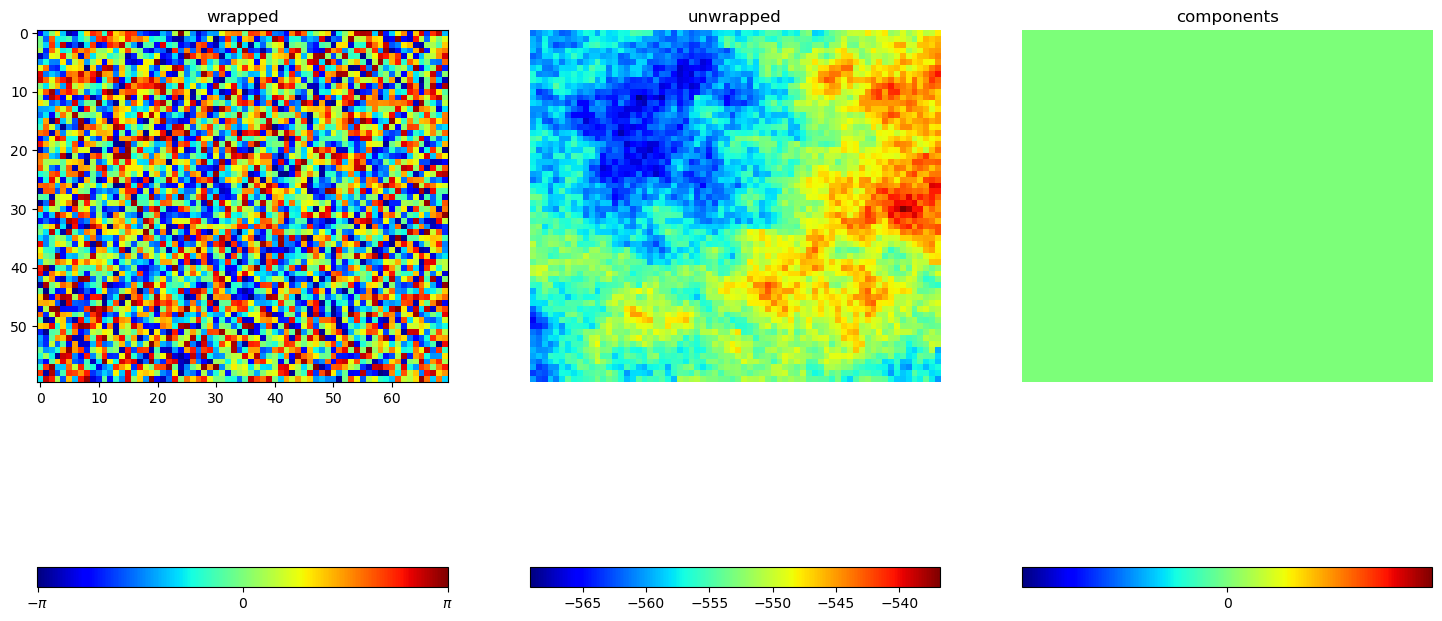

In [28]:
fig = plt.figure(figsize=(18, 16))

area = slice(2520, 2580), slice(1900, 1970)

ax = fig.add_subplot(1,3,1)
cax=ax.imshow(np.angle(igram[area]), cmap='jet')
ax.set_title("wrapped")
#ax.set_axis_off()
cbar = fig.colorbar(cax, ticks=[-3.14,0,3.14],orientation='horizontal')
cbar.ax.set_xticklabels(["$-\pi$",0,"$\pi$"])

ax = fig.add_subplot(1,3,2)
cax = ax.imshow(igram_unw[area], cmap = 'jet')
ax.set_title("unwrapped")
ax.set_axis_off()
cbar = fig.colorbar(cax, orientation='horizontal')

ax = fig.add_subplot(1,3,3)
cax = ax.imshow(connected_components[area], cmap = 'jet')
ax.set_title("components")
ax.set_axis_off()
cbar = fig.colorbar(cax, ticks=[0, 20] , orientation='horizontal')
cbar.ax.set_xticklabels([0,20])


In [125]:
alt_img2.values - alt_img1.values


array([17. , 22. , 42. , 20. , 27. , 17.5,  nan, 31.5, 23. , 16.5, 17. ,
       25. , 23. , 29. , 15. , 29. , 24.5, 23. , 20.5, 24. , 12.5, 16. ,
       26. , 25.5, 17. , 17.5, 34.5, 16. , 24.5, 23.5, 28. , 22.5, 17. ,
       21. , 25.5, 31.5, 51.5, 34.5, 23.5, 24. , 21.5, 30.5,  6.5, 12.5,
       19. , 19.5, 29. , 34.5, 29. , 20. , 25. , 26.5, 38. , 20.5, 21. ,
       16. , 23.5, 30. , 19.5, 30. , 17.5, 20.5, 30. , 27.5, 25.5, 18.5,
       14.5, 22. , 31. , 14.5, 45. , 23.5, 27.5, 29. , 30. , 18. , 26. ,
       13. , 21. , 25.5, 12.5, 50. , 24. , 35. , 17.5, 20. , 14. , 20. ,
       22. , 21.5, 31. , 15.5, 73. , 11. , 26. , 24.5, 13. , 12.5, 18.5,
       19.5, 23. , 28.5, 18. , 25.5, 17. , 16. , 19. , 23.5, 13.5,  nan,
       20.5, 23. , 26. , 13.5, 20.5, 10.5, 24. , 18.5, 16.5, 19.5,  nan])

In [120]:
df_calm_img2


,date,point_id,latitude,longitude,alt_m
2541,2006-08-06,1,71.31538,-156.602714,25.5
2542,2006-08-06,2,71.31534,-156.599920,31
2543,2006-08-06,3,71.31531,-156.597126,55
2544,2006-08-06,4,71.31527,-156.594332,20
2545,2006-08-06,5,71.31524,-156.591537,27
...,...,...,...,...,...
2657,2006-08-06,117,71.30621,-156.587064,37.5
2658,2006-08-06,118,71.30617,-156.584272,29.5
2659,2006-08-06,119,71.30614,-156.581479,29.5
2660,2006-08-06,120,71.30610,-156.578686,33.5


In [119]:
df_calm_img1


,date,point_id,latitude,longitude,alt_m
2420,2006-06-24,1,71.31538,-156.602714,8.5
2421,2006-06-24,2,71.31534,-156.599920,9
2422,2006-06-24,3,71.31531,-156.597126,13
2423,2006-06-24,4,71.31527,-156.594332,0
2424,2006-06-24,5,71.31524,-156.591537,0
...,...,...,...,...,...
2536,2006-06-24,117,71.30621,-156.587064,13.5
2537,2006-06-24,118,71.30617,-156.584272,11
2538,2006-06-24,119,71.30614,-156.581479,13
2539,2006-06-24,120,71.30610,-156.578686,14


In [1]:

# incidence angle
ia = 38.7*np.pi/180
wavelength = 0.2360571

# has unwrapping issue, deal w later
# negative cause we calculated (time_before) - (time_after), but
# we really want (time_after - time-before)?
los_def = -93/(2*np.pi)*wavelength

ground_def = los_def / np.cos(ia)

# # Plot the unwrapped phase or flattened interferogram
# plt.imshow(ground_def_cm, cmap='jet')
# plt.colorbar(label='Ground Deformation (cm)')
# plt.show()
ground_def


NameError: name 'np' is not defined

In [34]:
# Looking at interferogram?
intfg_flat = load_img("../data/interferogram/filt_topophase.flat.xml")
intfg_unw = load_img("../data/interferogram/filt_topophase.unw.xml")


In [37]:
intfg_flat.dtype, intfg_flat.shape, intfg_unw.dtype, intfg_unw.shape


(dtype('complex64'), (4608, 2370), dtype('float32'), (4608, 2, 2370))

2023-08-30 12:29:48,305 - matplotlib.pyplot - DEBUG - Loaded backend module://matplotlib_inline.backend_inline version unknown.
2023-08-30 12:29:48,307 - matplotlib.pyplot - DEBUG - Loaded backend module://matplotlib_inline.backend_inline version unknown.
2023-08-30 12:29:48,314 - matplotlib.font_manager - DEBUG - findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
2023-08-30 12:29:48,314 - matplotlib.font_manager - DEBUG - findfont: score(FontEntry(fname='/usr/local/lib/python3.8/dist-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSerifDisplay.ttf', name='DejaVu Serif Display', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-08-30 12:29:48,315 - matplotlib.font_manager - DEBUG - findfont: score(FontEntry(fname='/usr/local/lib/python3.8/dist-packages/matplotlib/mpl-data/fonts/ttf/STIXGeneralItalic.ttf', name='STIXGeneral', style='italic', variant='normal', weight=400, stretch='normal', size='sca

(array([[   0.,    0.,    0., ...,   66.,   64.,   64.],
        [   0.,    0.,    0., ...,   65.,   64.,   65.],
        [   0.,    0.,    0., ...,   62.,   65.,   66.],
        ...,
        [1935.,  400., 1921., ...,   68.,   40.,    0.],
        [1934.,  408., 1916., ...,   69.,   40.,    0.],
        [1936.,  413., 1911., ...,   70.,   40.,    0.]]),
 array([-357.94726562, -266.08279419, -174.21833801,  -82.35386658,
           9.51059532,  101.37506104,  193.23953247,  285.10400391,
         376.96844482,  468.83291626,  560.6973877 ]),
 <a list of 2370 BarContainer objects>)

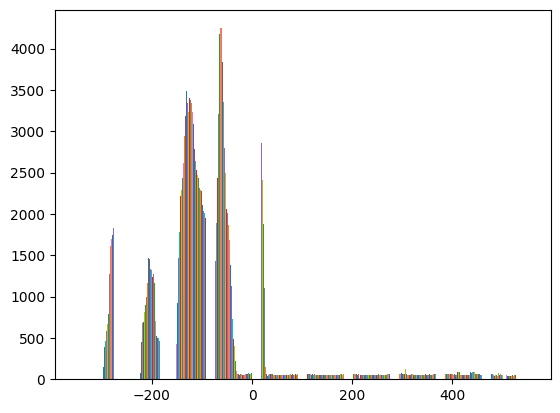

In [30]:
# from upsample_unw this appears to be phase (phase diff?) in radians
plt.hist(intfg[:,1,:])


In [38]:
angles = np.angle(intfg_flat)


2023-08-30 12:36:24,214 - matplotlib.colorbar - DEBUG - locator: <matplotlib.ticker.AutoLocator object at 0x7f855d6a5190>


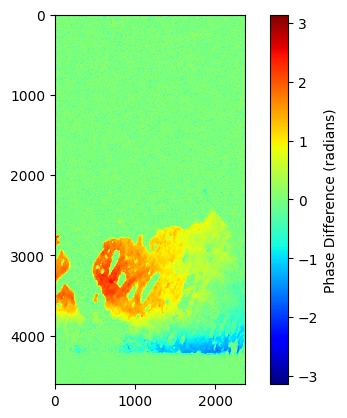

In [40]:
# Plot the unwrapped phase or flattened interferogram
plt.imshow(angles, cmap='jet')
plt.colorbar(label='Phase Difference (radians)')
plt.show()


2023-08-30 12:48:14,248 - matplotlib.colorbar - DEBUG - locator: <matplotlib.ticker.AutoLocator object at 0x7f855d496b80>


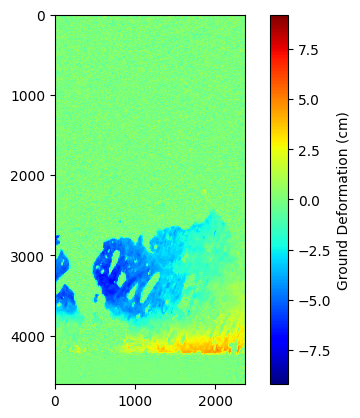

In [48]:
# incidence angle
ia = 38.7*np.pi/180
wavelength = 0.2360571

# has unwrapping issue, deal w later
# negative cause we calculated (time_before) - (time_after), but
# we really want (time_after - time-before)?
los_def = -angles/(2*np.pi)*wavelength

ground_def_cm = np.cos(ia) * los_def * 100

# Plot the unwrapped phase or flattened interferogram
plt.imshow(ground_def_cm, cmap='jet')
plt.colorbar(label='Ground Deformation (cm)')
plt.show()


2023-08-30 12:30:51,412 - matplotlib.colorbar - DEBUG - locator: <matplotlib.ticker.AutoLocator object at 0x7f8561a25430>
2023-08-30 12:30:51,418 - matplotlib.font_manager - DEBUG - findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=12.0.
2023-08-30 12:30:51,418 - matplotlib.font_manager - DEBUG - findfont: score(FontEntry(fname='/usr/local/lib/python3.8/dist-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSerifDisplay.ttf', name='DejaVu Serif Display', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-08-30 12:30:51,419 - matplotlib.font_manager - DEBUG - findfont: score(FontEntry(fname='/usr/local/lib/python3.8/dist-packages/matplotlib/mpl-data/fonts/ttf/STIXGeneralItalic.ttf', name='STIXGeneral', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
2023-08-30 12:30:51,419 - matplotlib.font_manager - DEBUG - findfont: score(FontEntry(fname='/usr/local/lib/python3.8

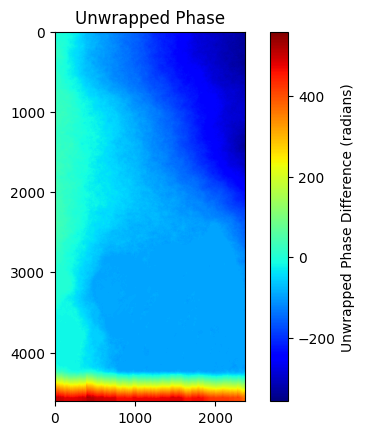

In [33]:
# Plot the unwrapped phase or flattened interferogram
plt.imshow(intfg[:,1,:], cmap='jet')
plt.colorbar(label='Unwrapped Phase Difference (radians)')
plt.show()
